In [117]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [118]:
data = pd.read_csv('BostonHousing.csv',sep=',')
data.shape

(506, 14)

In [119]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 1

* On va établir la matrice de correlation afin d'analyser la relation entre les différentes variables explicatives

<Axes: >

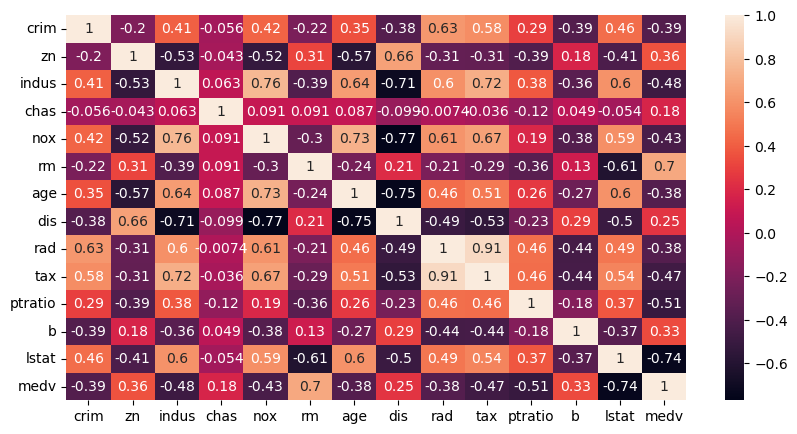

In [122]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(),  annot=True)

* De la matrice de correlation, on remarque que:
    * Les variables 'tax' et 'rad' sont fortement correlées, alors afin d'eviter la multicollinéarité on garde qu'une des deux variables.
    * Certaines variables comme : 'rm', 'indus', 'tax', 'ptratio' et 'lstat' sont fortement correllées avce la variables à expliquer 'medv' 
    

### Traitement des données

### Valeurs aberrantes

##### Visualisation des valeurs aberrantes

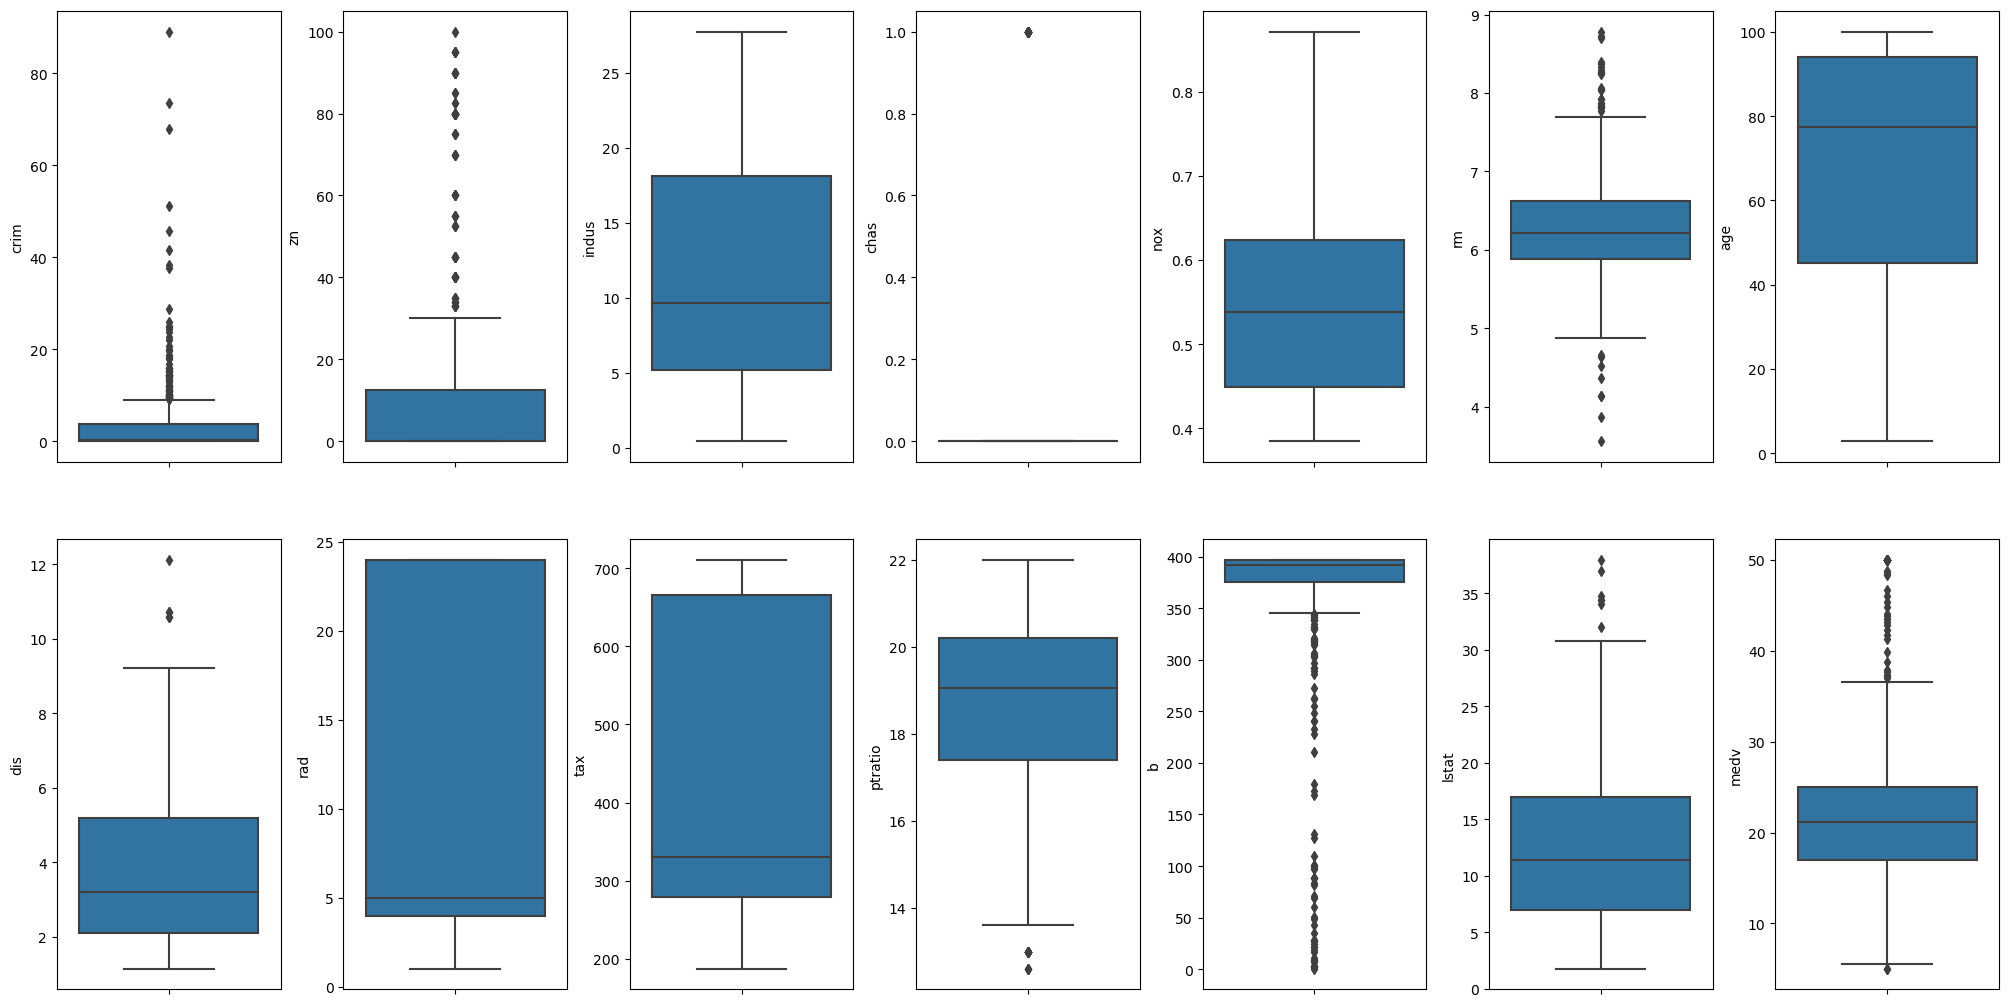

In [124]:

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

* On remarque que les données comporte des valeurs aberrantes comme les variables : 'crim', 'zn', 'b'

##### Suppression des valeurs aberrantes

In [125]:

z_scores = np.abs(stats.zscore(data))

# Define the threshold (e.g., z-score greater than 3)
threshold = 3

# Create a boolean mask to identify the outliers
outlier_mask = (z_scores > threshold).any(axis=1)

#Filter the dataset to remove the outliers
data_filtred = data[~outlier_mask]
data_filtred.shape

(415, 14)

##### Entrainement du modèle

In [128]:
model = sm.formula.ols("medv ~ 1 +  nox+ rm+ dis+ ptratio+ lstat",data = data_filtred).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     220.4
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          1.18e-113
Time:                        14:00:41   Log-Likelihood:                -1184.1
No. Observations:                 415   AIC:                             2380.
Df Residuals:                     409   BIC:                             2404.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.1894      4.711      5.559      0.000      16.928      35.451
nox          -14.7863      3.306     -4.473      0.000     -21.285      -8.287
rm             5.0590      0.449     11.274      0.000       4.177       5.941
dis           -1.0309      0.171     -6.046      0.000      -1.366      -0.696
ptratio       -0.9286      0.106     -8.769      0.000      -1.137      -0.720
lstat         -0.5158      0.050    -10.216      0.000      -0.615      -0.417
==============================================================================
Omnibus:                      198.673   Durbin-Watson:                   1.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1801.224
Skew:                           1.824   Prob(JB):                         0.00
Kurtosis:                      12.532   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


* J'ai selectionner les vaiables avec une selection sucessive utilisant le test de T-student, j'ai eu un modèle avec 5 variables.
    * les variables éliminées avaient un t-ration < |1.96| et donc un p-value > 0.05
* Les vaiables les plus significativbes dans l'ordre sont : 'lstat', 'rm', 'ptratio', 'dis', 'nox'.
* Le score du modèle est à 73 % 


### Analyse des relations linéaires

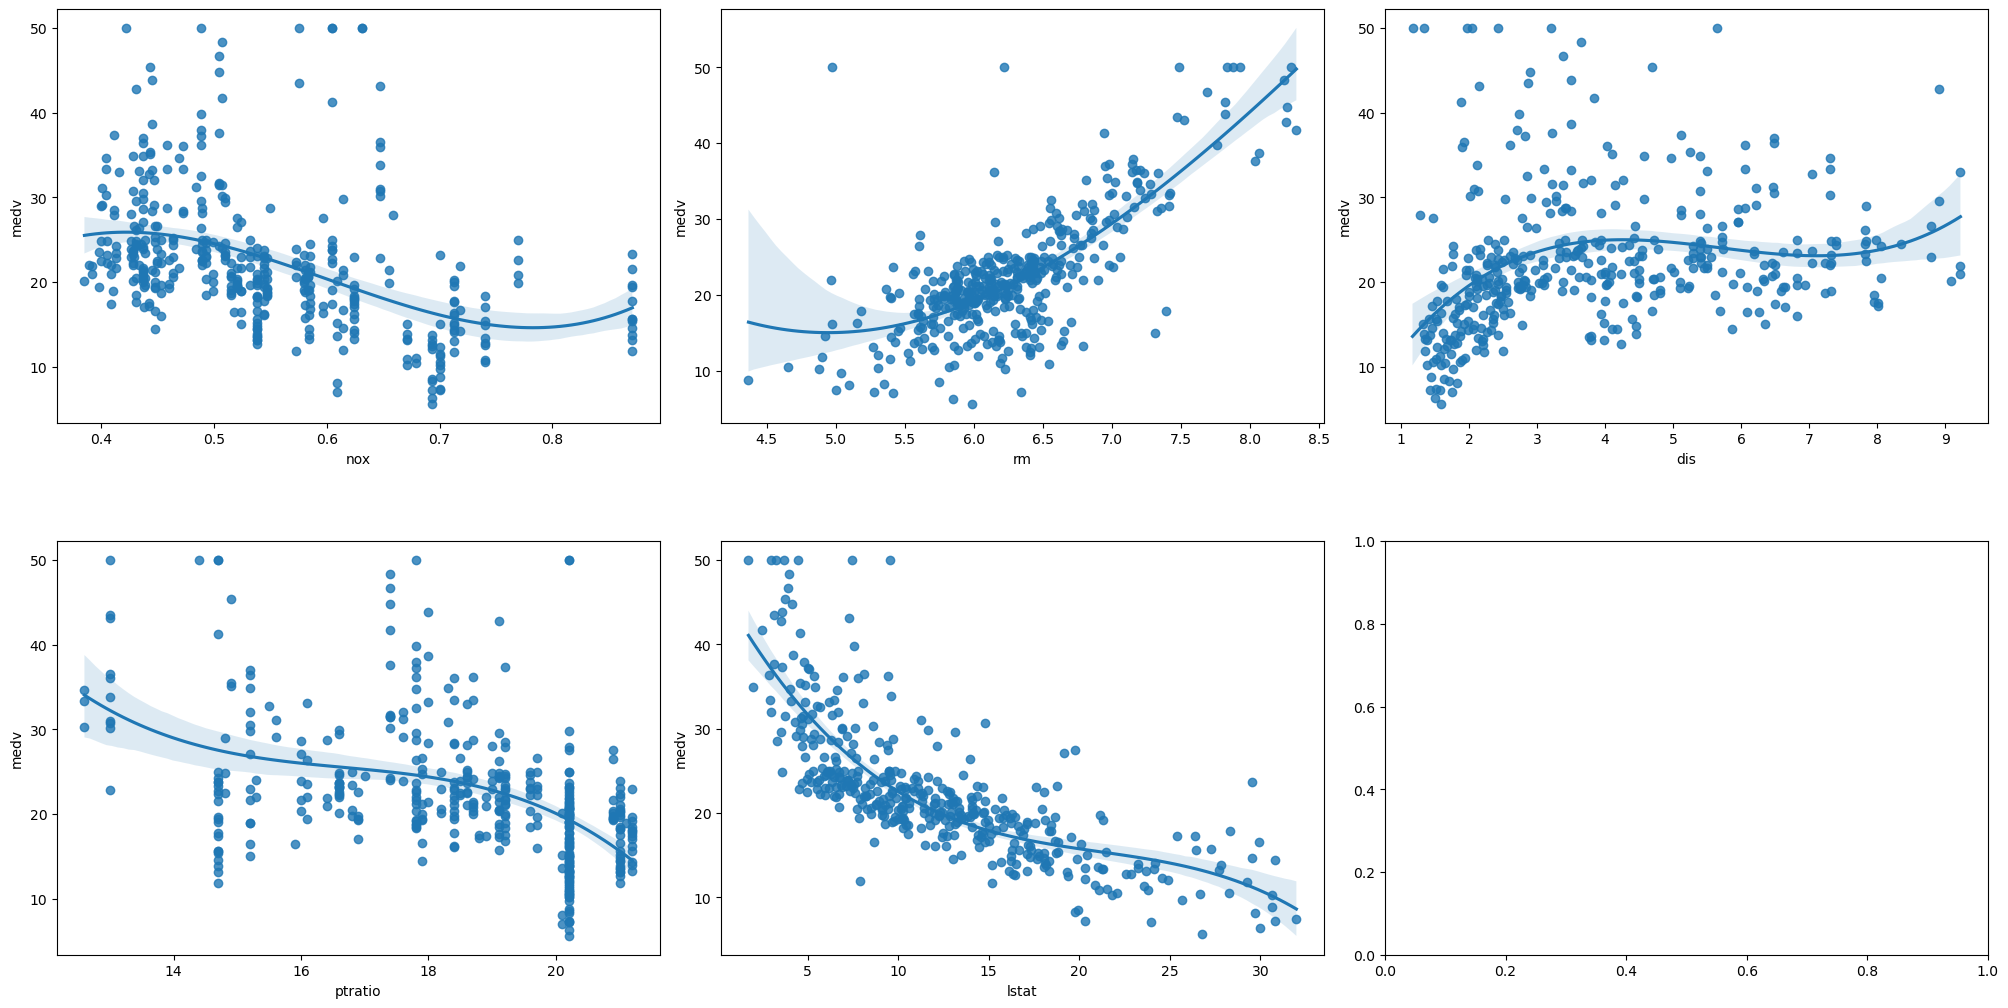

In [129]:
l = ['nox','rm','dis','ptratio','lstat']


x = data_filtred.loc[:,l]
y = data_filtred['medv']
x = pd.DataFrame(data=x, columns=l)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(l):
    sns.regplot(y=y, x=x[k], ax=axs[i],order=3)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



* En analysant la qualité des relations linéaires entre la variable à expliquer 'medv' et les varibales explicatives préselectionnées. On peut rapidement déduiure que :
    * la ralation linéaire est trés présente concernant certaines varaibles tel que : 'rm','dis','lstat', 'nox'
    * Les variables identifiées comme les plus significatives ci-dessus sont confirmées, car on arrive à s'aperçevoir facilement des relations linéaires de ces dernière avec la variable cible 'medv'.
     

### Etude des résidus

#### Distribution des résidus sur l'axe des ordonées

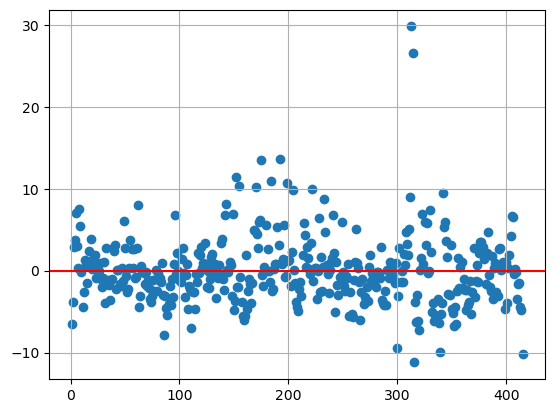

In [130]:
abs = np.arange(1,len(model.resid)+1)
axes = plt.axes()
axes.grid()
plt.scatter(abs, model.resid)
plt.axhline(y=0, color='r', linestyle='-')

* On peut remarquer que les résidus sont distribués de maniére non homogéne au niveau de l'axe 0, il ya un nombre de points qui sont loin de l'axe horizontale. Ils doivent êtres causé par les valeurs aberrantes restantes de certaines variables qui ont servi à l'entrainement du modèle, ou bien à cause de l'absence de transformation des données en entrées du modèle.

#### Vérification de l'hypothése de normalité des résidus

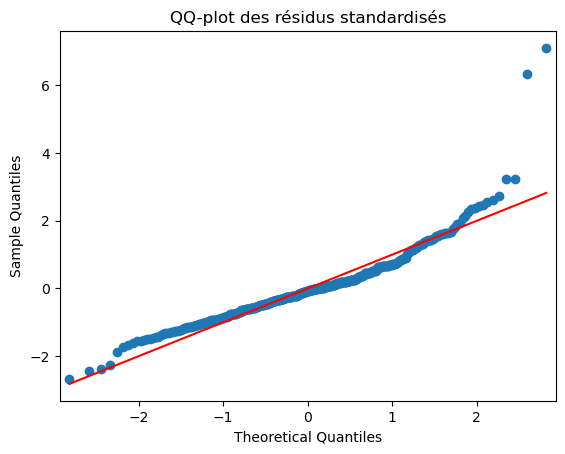

In [131]:
residuals = model.resid
std_residuals = (residuals - residuals.mean()) / residuals.std() 
sm.qqplot(std_residuals, line='s')  
plt.title('QQ-plot des résidus standardisés')
plt.show()

* On peut remarquer que ajustement des résidus n'est pas parfait. On a des points loin de la droite normale. Donc, il ne suivent pas correctement la loi normale, alors l'hypothése de normalité des résidus est rejetée.

#### Vérification de la variance constante des residus "Scale-location"

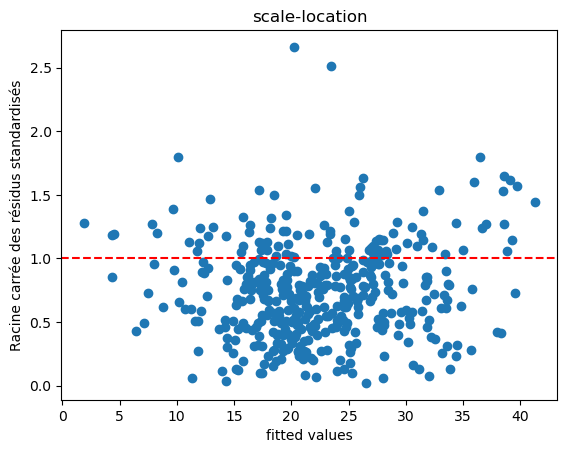

In [133]:
# Calculer les valeurs ajustées (fitted values)
fitted_values = model.fittedvalues

# Calculer les résidus standardisés
residuals = model.resid
std_residuals = (residuals - residuals.mean()) / residuals.std()

# Calculer la racine carrée des résidus standardisés
sqrt_std_residuals = np.sqrt(np.abs(std_residuals))

# Tracer le graphique de la racine carrée des résidus standardisés en fonction des valeurs ajustées
plt.scatter(fitted_values, sqrt_std_residuals)
plt.axhline(y=1, color='red', linestyle='--')  # Ligne horizontale à y=1 (pour tester la constance de la variance)
plt.xlabel('fitted values')
plt.ylabel('Racine carrée des résidus standardisés')
plt.title('scale-location')
plt.show()

* On peut clairement remarquer que la variance des résidus n'est pas constante. Les résidus ne sont pas distribués aléatoirement. Ils sont entre 15 et 32 pour les valeurs ajustées et 0 et 1.2 pour la racine carrée des résidus standardisés, donc les hypothése de validité de la regression ne sont pas verifiées.
* Il faut penser à transformer la variables 'medv'en 'ln(medv)' ou 'racine(medv)'

##### Avis sur le modèle

* En faisant les 5 tests, j'ai pu déduire que la relation linéaire entre les données est forte et cohérente. Mais, qu'il reste encore des points qui font baisser la fiabilité de la regression. La regression n'est pas vérifié ce qu'il implique des traitements des données à effectuer. Les tests ont montré que le modèle n'est pas assez performant et qu'il y a des amélioration à mettre en place.

## 2

In [150]:
df = data_filtred.copy()


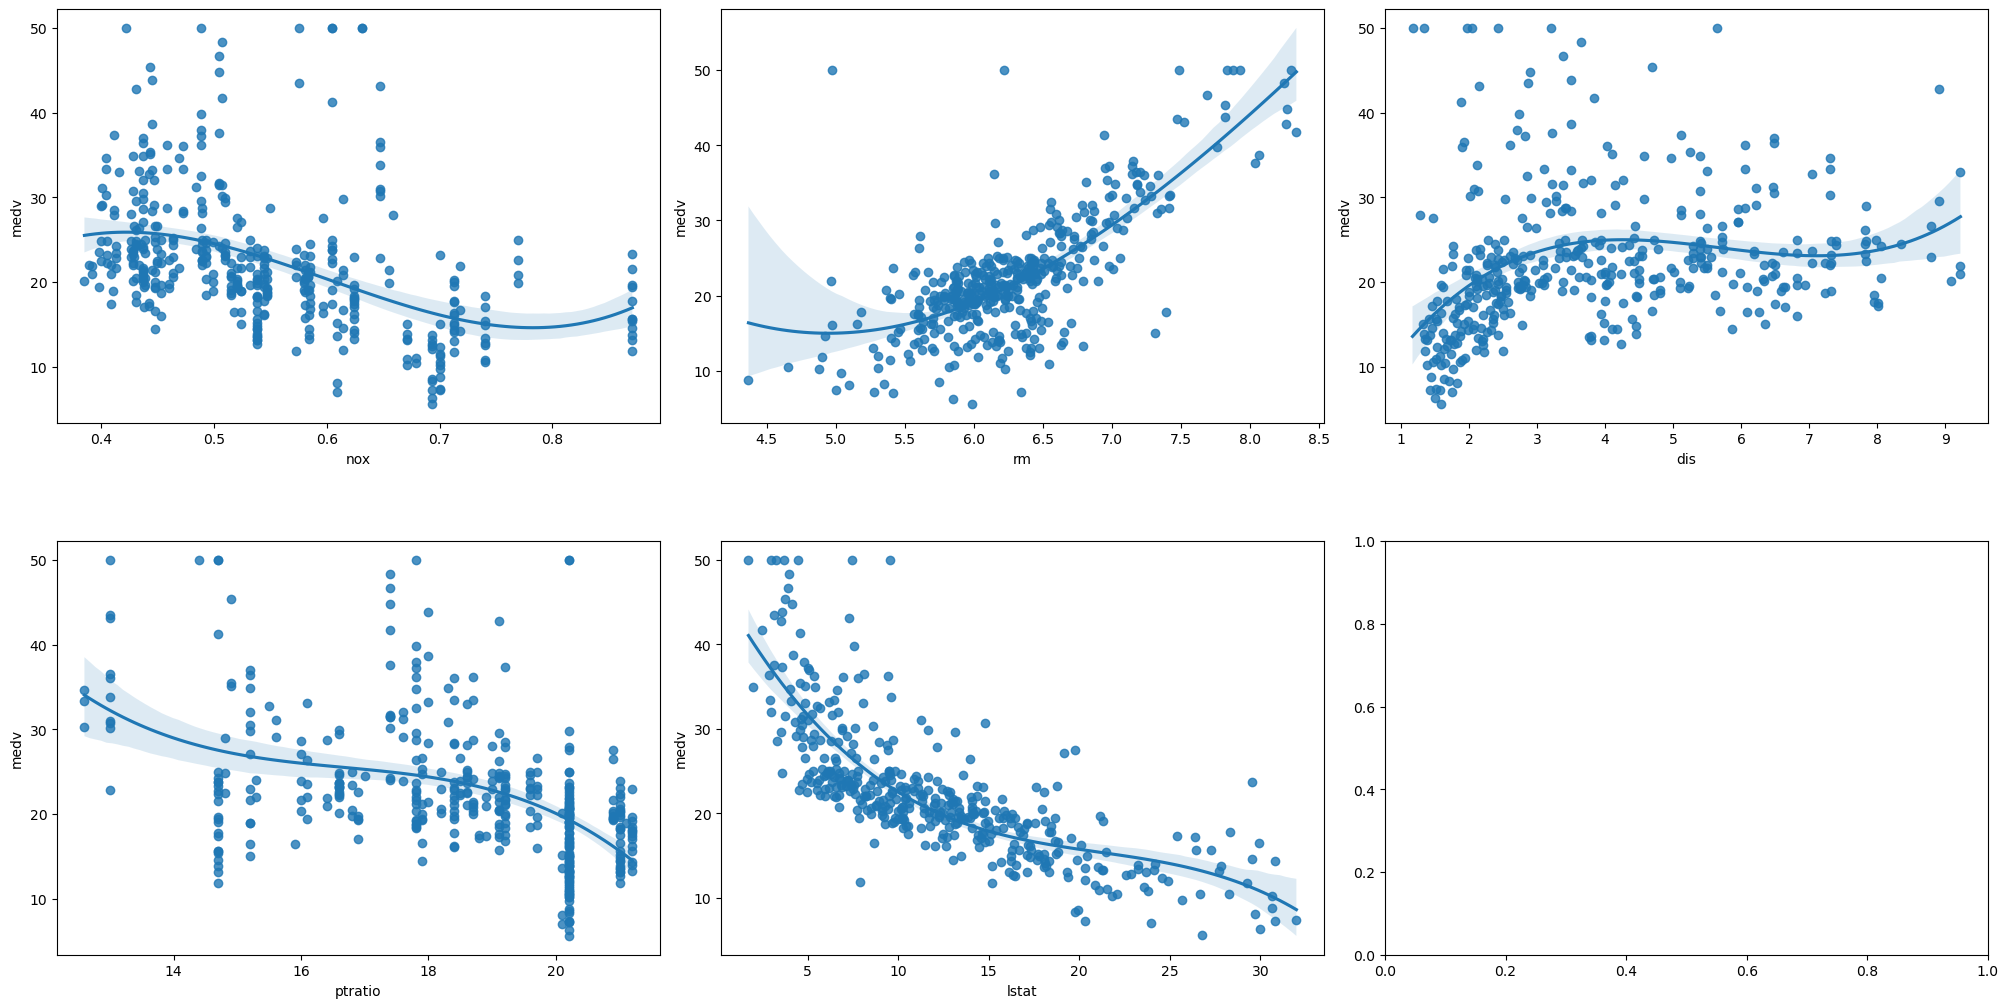

In [151]:
x = data_filtred.loc[:,l]
y = data_filtred['medv']
x = pd.DataFrame(data=x, columns=l)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(l):
    sns.regplot(y=y, x=x[k], ax=axs[i],order=3)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


#### Les transformations à effectuer sur les données

* En analysant la relation entre les différentes variables, j'ai opté pour les transformations suivantes, car elles traduiraientt mieux les relations existantes entres ces variables explicatives et la varibales 'medv'.
* J'ai choisi de ne pas appliquer des transformation pour les variables 'dis' et 'nox' car la relation linéaire est assez visible et clair.

In [152]:
df['ptratio'] = (1/df['ptratio'])
df['lstat'] = (1/df['lstat'])
df['rm'] = np.power((df['rm']),3)

##### Normalisationd des données 

In [154]:
scaler = MinMaxScaler()

# Normalize all columns of the DataFrame
data_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

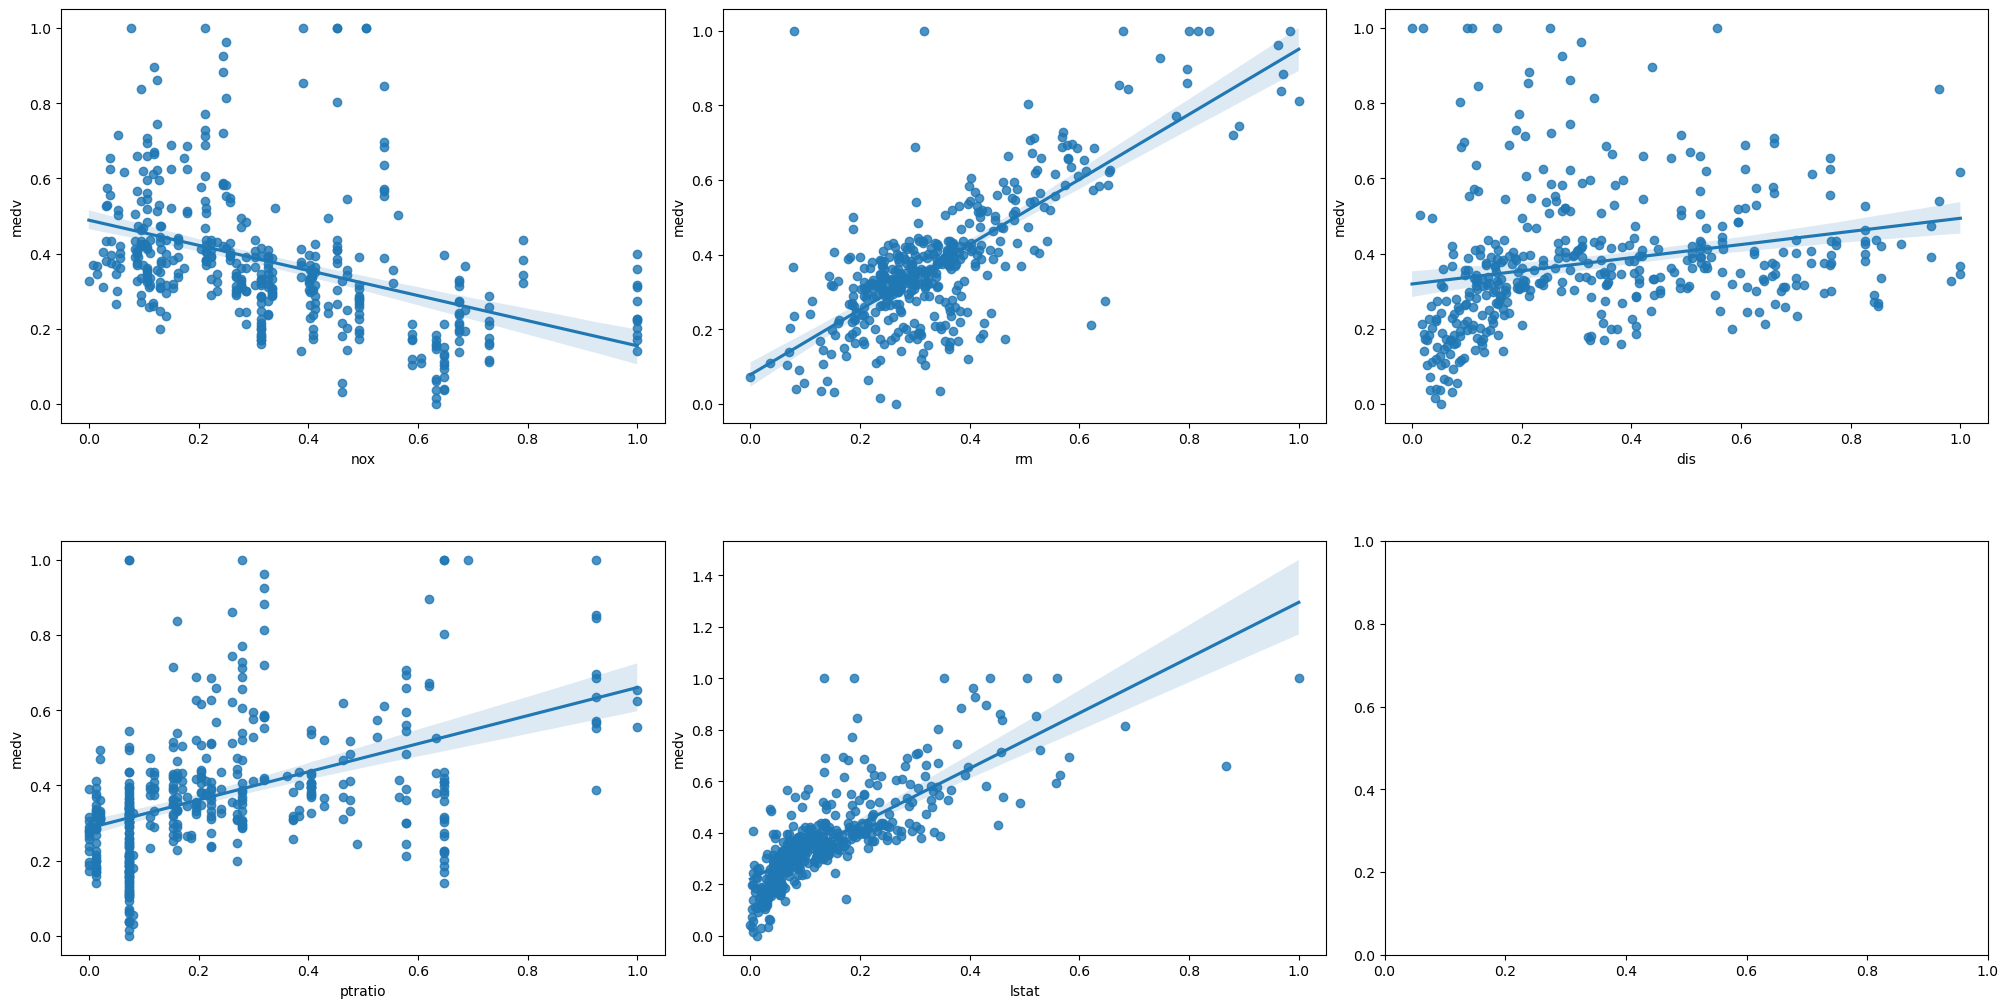

In [155]:
x = data_normalized.loc[:,l]
y = data_normalized['medv']
x = pd.DataFrame(data=x, columns=l)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(l):
    sns.regplot(y=y, x=x[k], ax=axs[i],order=1)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

* Aprés la transformation on arrive à mieux interpreter la relation linéaire entres les variables explicatives et la variable à expliquer 'medv'.

* La normalisations des données nous a permit de ramener toutes les données à la même echelle, donc mieux visualiser et interpreter les relations linéaires, mais aussi permettte au modéle d'avoir des données cohérentes en entrées

In [157]:
model = sm.formula.ols("medv ~ 1 +  nox+ rm+ dis+  ptratio+ lstat",data = data_normalized).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     265.3
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          6.31e-126
Time:                        14:25:45   Log-Likelihood:                 418.80
No. Observations:                 415   AIC:                            -825.6
Df Residuals:                     409   BIC:                            -801.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2362      0.023     10.211      0.000       0.191       0.282
nox           -0.2254      0.032     -6.964      0.000      -0.289      -0.162
rm             0.4295      0.038     11.319      0.000       0.355       0.504
dis           -0.1724      0.029     -5.960      0.000      -0.229      -0.116
ptratio        0.1824      0.021      8.617      0.000       0.141       0.224
lstat          0.5647      0.049     11.521      0.000       0.468       0.661
==============================================================================
Omnibus:                      186.248   Durbin-Watson:                   1.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1993.366
Skew:                           1.618   Prob(JB):                         0.00
Kurtosis:                      13.237   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* La premiére remarque est que la performance du modèle a augmenter de 4 point suite aux transformations et à la normalisation
* La siginificativté de certaines variables est plus importante, c'est le cas des variables 'lstat' qui est passé de 10 à 11 et de nox qui est passé de 5 à ~7. De la, on peut déduire l'importance que les transformations sur les données peuvent avoir sur la significativté de ces derniéres et donc sur l'apprentissage du modèle.

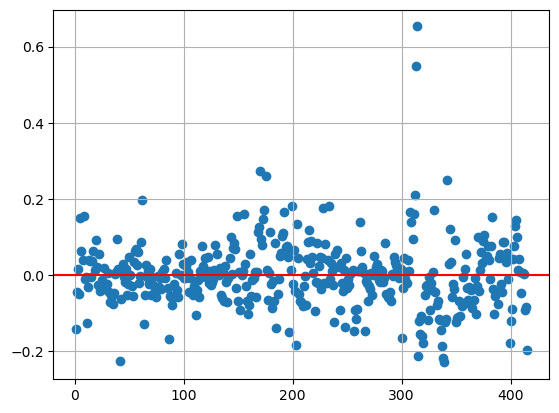

In [159]:
abs = np.arange(1,len(model.resid)+1)
axes = plt.axes()
axes.grid()
plt.scatter(abs, model.resid)
plt.axhline(y=0, color='r', linestyle='-')

* La distribution des résidus est plus centrée et homogéne sur l'axe horizentale par rapport au modéle de la question 1.
* Le probléme des deux points loins de l'axe persiste, même avec les transformations et la normalisation établie.

#### Vérification de l'hypothése de normalité des résidus

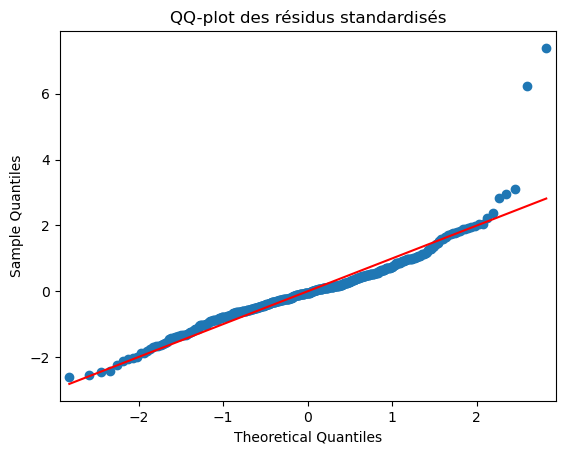

In [161]:
residuals = model.resid
std_residuals = (residuals - residuals.mean()) / residuals.std() 
sm.qqplot(std_residuals, line='s')  
plt.title('QQ-plot des résidus standardisés')
plt.show()

* Pour ce deuxiéme modèle amélioré, les résidus suivent parfaitement la loi normal à l'exception des deux points aberrants.
* En ignorant ces deux points, on peut conclure que l'hypthése de la normalité des résidus est acceptée et donc la regression vérifiée  

### Vérification de la constance de la variance des resdius

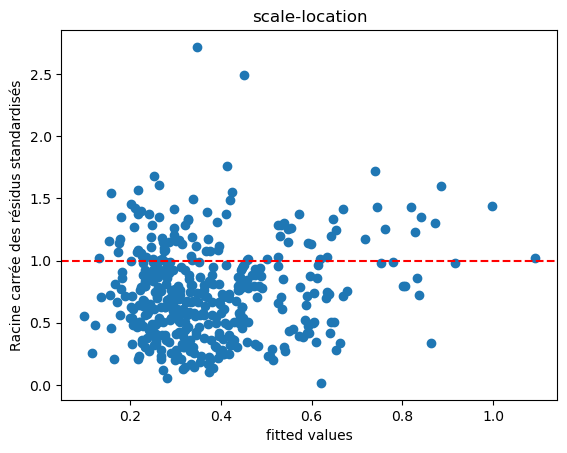

In [163]:
# Calculer les valeurs ajustées (fitted values)
fitted_values = model.fittedvalues

# Calculer les résidus standardisés
residuals = model.resid
std_residuals = (residuals - residuals.mean()) / residuals.std()

# Calculer la racine carrée des résidus standardisés
sqrt_std_residuals = np.sqrt(np.abs(std_residuals))

# Tracer le graphique de la racine carrée des résidus standardisés en fonction des valeurs ajustées
plt.scatter(fitted_values, sqrt_std_residuals)
plt.axhline(y=1, color='red', linestyle='--')  
plt.xlabel('fitted values')
plt.ylabel('Racine carrée des résidus standardisés')
plt.title('scale-location')
plt.show()

* La variance des résidus est aléatoire à un certain pourcentage, et elle est meilleure comparant au modèle de la question 1. Ce qui confirme encore ce modèle.

## Log-log

In [167]:
model = sm.formula.ols("medv ~ 1 +  np.log(nox)+ np.log(rm)+ np.log(dis)+ np.log(ptratio)+ np.log(lstat)",data = data_filtred).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     250.4
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          4.88e-122
Time:                        14:51:38   Log-Likelihood:                -1164.5
No. Observations:                 415   AIC:                             2341.
Df Residuals:                     409   BIC:                             2365.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          39.5264      8.207      4.816      0.000      23.393      55.660
np.log(nox)        -9.4334      2.139     -4.410      0.000     -13.638      -5.228
np.log(rm)         22.8641      2.849      8.024      0.000      17.263      28.465
np.log(dis)        -4.9031      0.756     -6.482      0.000      -6.390      -3.416
np.log(ptratio)   -13.5800      1.733     -7.838      0.000     -16.986     -10.174
np.log(lstat)      -8.2190      0.583    -14.091      0.000      -9.366      -7.072
==============================================================================
Omnibus:                      123.577   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.599
Skew:                           1.209   Prob(JB):                    3.09e-127
Kurtosis:                       8.277   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* La performance du modele log-log est semblable à celle du modéle avec transformation des données
* La siginificativité des variables a encore une fois évolué cocnernant certaines variables comme : 'lstat' et 'ptratio'.
* Les coefficients sont plus importants comparant au modèle precédent et au niveau de toutes les variables.

### Etude des résidus

#### Distribution des résidus sur l'axe horizentale

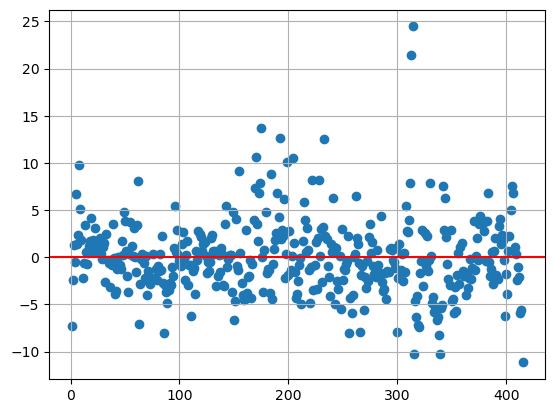

In [30]:
abs = np.arange(1,len(model.resid)+1)
axes = plt.axes()
axes.grid()
plt.scatter(abs, model.resid)
plt.axhline(y=0, color='r', linestyle='-')

#### Vérification de l'hypothése de normalité des résidus

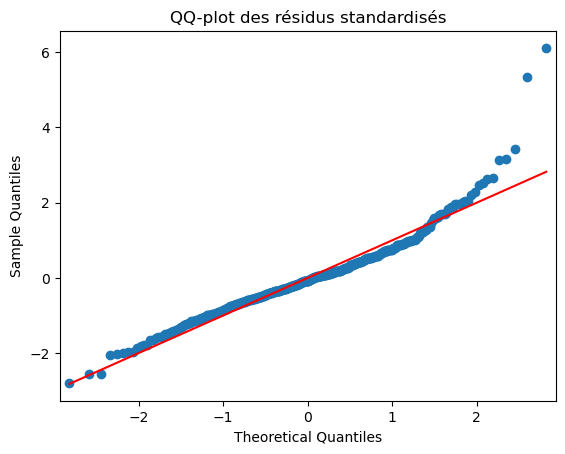

In [31]:
residuals = model.resid
std_residuals = (residuals - residuals.mean()) / residuals.std() 
sm.qqplot(std_residuals, line='s')  
plt.title('QQ-plot des résidus standardisés')
plt.show()

#### Vérification de la variance constante des residus "Scale-location"

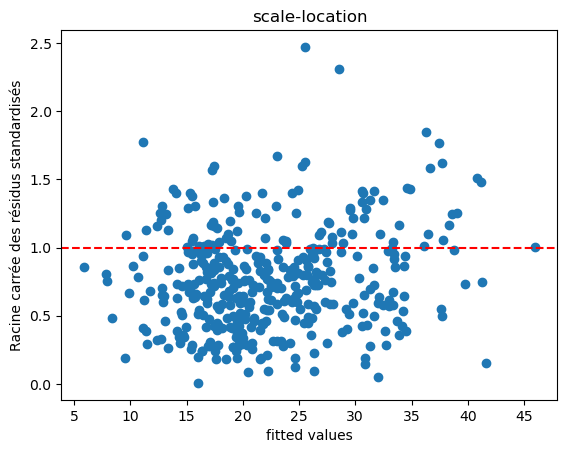

In [170]:
fitted_values = model.fittedvalues

# Calculer les résidus standardisés
residuals = model.resid
std_residuals = (residuals - residuals.mean()) / residuals.std()

# Calculer la racine carrée des résidus standardisés
sqrt_std_residuals = np.sqrt(np.abs(std_residuals))

# Tracer le graphique de la racine carrée des résidus standardisés en fonction des valeurs ajustées
plt.scatter(fitted_values, sqrt_std_residuals)
plt.axhline(y=1, color='red', linestyle='--') 
plt.xlabel('fitted values')
plt.ylabel('Racine carrée des résidus standardisés')
plt.title('scale-location')
plt.show()

* Mêmes remarques pour la distribution et la normalité des résidus

 * Aprés comparaison des modéles avec les différents tests, je constate que les modèles sont à une performance plus ou moins équivalente, mais reste le modèle avec les transformations spécifiques à chaques variables plus adéquat et efficace.

## 3

### Regression logistique

In [172]:
data_logit = data.copy()

In [173]:
median_medv = data_logit['medv'].median()
data_logit['MEDV'] = np.where(data_logit['medv'] > median_medv, 1, 0)
data_logit

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,1


In [35]:
data_logit.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'MEDV'],
      dtype='object')

In [36]:
model_logit = sm.formula.logit("MEDV~ 1 + chas + nox + rm + age + dis + ptratio + lstat",data = data_logit).fit()
model_logit.summary()

Optimization terminated successfully.
         Current function value: 0.298408
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   MEDV   No. Observations:                  506
Model:                          Logit   Df Residuals:                      498
Method:                           MLE   Df Model:                            7
Date:                Sun, 11 Jun 2023   Pseudo R-squ.:                  0.5694
Time:                        12:20:34   Log-Likelihood:                -150.99
converged:                       True   LL-Null:                       -350.70
Covariance Type:            nonrobust   LLR p-value:                 3.200e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6647      3.099      2.473      0.013       1.591      13.738
chas           1.9873      0.629      3.160      0.002       0.755       3.220
nox           -5.1419      2.149     -2.392      0.017      -9.355      -0.929
rm             1.5768      0.398      3.962      0.000       0.797       2.357
age           -0.0255      0.010     -2.644      0.008      -0.044      -0.007
dis           -0.5337      0.114     -4.697      0.000      -0.756      -0.311
ptratio       -0.3918      0.082     -4.762      0.000      -0.553      -0.231
lstat         -0.3098      0.049     -6.370      0.000      -0.405      -0.214
==============================================================================
"""

<Axes: >

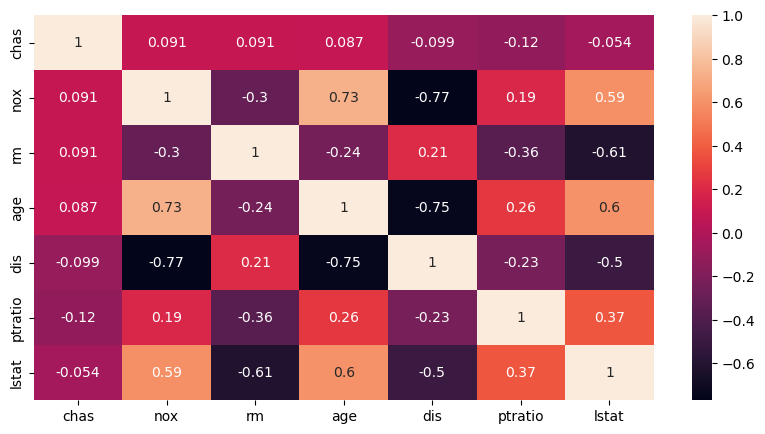

In [37]:
plt.figure(figsize=(10, 5))
sns.heatmap(data_logit[['chas','nox','rm','age','dis','ptratio','lstat']].corr(),  annot=True)

* correlation forte entre nox, dis, lstat et age, alors on élimine age du model
* correlation forte entre nox et dis donc on élminie nox

In [38]:
model_logit = sm.formula.logit("MEDV~ 1 + chas +  rm + dis + ptratio + lstat",data = data_logit).fit()
model_logit.summary()

Optimization terminated successfully.
         Current function value: 0.317427
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   MEDV   No. Observations:                  506
Model:                          Logit   Df Residuals:                      500
Method:                           MLE   Df Model:                            5
Date:                Sun, 11 Jun 2023   Pseudo R-squ.:                  0.5420
Time:                        12:20:35   Log-Likelihood:                -160.62
converged:                       True   LL-Null:                       -350.70
Covariance Type:            nonrobust   LLR p-value:                 5.596e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2638      2.726      1.564      0.118      -1.080       9.608
chas           1.6932      0.626      2.707      0.007       0.467       2.919
rm             1.3015      0.360      3.619      0.000       0.597       2.006
dis           -0.1929      0.079     -2.454      0.014      -0.347      -0.039
ptratio       -0.3838      0.079     -4.849      0.000      -0.539      -0.229
lstat         -0.3865      0.046     -8.479      0.000      -0.476      -0.297
==============================================================================
"""

* On remarque que le modèle de regression logistique est moins performant que les modèles de regression multiple.  
* Les variables significatives ne sont pas totalement les mêmes dans les deux modèles, on retrouve notament les variables 'chas' et 'age' dans la regression logistique et pas  dans la multiple.
* Les valeurs de la significativité des variables sont inférieures à celles des modèles de la regression linéaire multiple.
* Ces remarques s'expliquent par la non adéquation du probléme à une regression logistique et l'abscence des variables binaires dans le jeu de données à l'exception de 'chas'.

## 4


In [174]:
from pyclustertend import hopkins
from pyclustertend import vat
from pyclustertend import ivat
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [175]:
data_to_class = data.copy()
data_to_class

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Test de Hopkins

In [180]:
x = data_to_class[['crim', 'zn', 'indus','nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']].values 
min_max_scaler = preprocessing.MinMaxScaler() 
x_scaled = min_max_scaler.fit_transform(x) 
df_result = pd.DataFrame(x_scaled)
df_result

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.18,0.067815,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [181]:
sampling_size = int(df_result.shape[0] * 0.1) 
sampling_size

50

In [182]:
# Calculate the Hopkins statistic
hopkins_statistic = hopkins(data_to_class[['crim', 'zn', 'indus','nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']],int(sampling_size))
print("Hopkins Statistic: ", hopkins_statistic)

Hopkins Statistic:  0.09310511932888003


In [183]:
l=[]
for i in range(0,1000):
    l.append(hopkins(data_to_class[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']],int(sampling_size)))
median = np.median(l)
print(median)

0.08299430822306715


* La valeur du test hopkins est 0.08, ce qui indique de forts regroupements dans les données, donc la possibilité de les affecter à des classes communes. 

### Tests visuels ( VAT et IVAT ) 

None


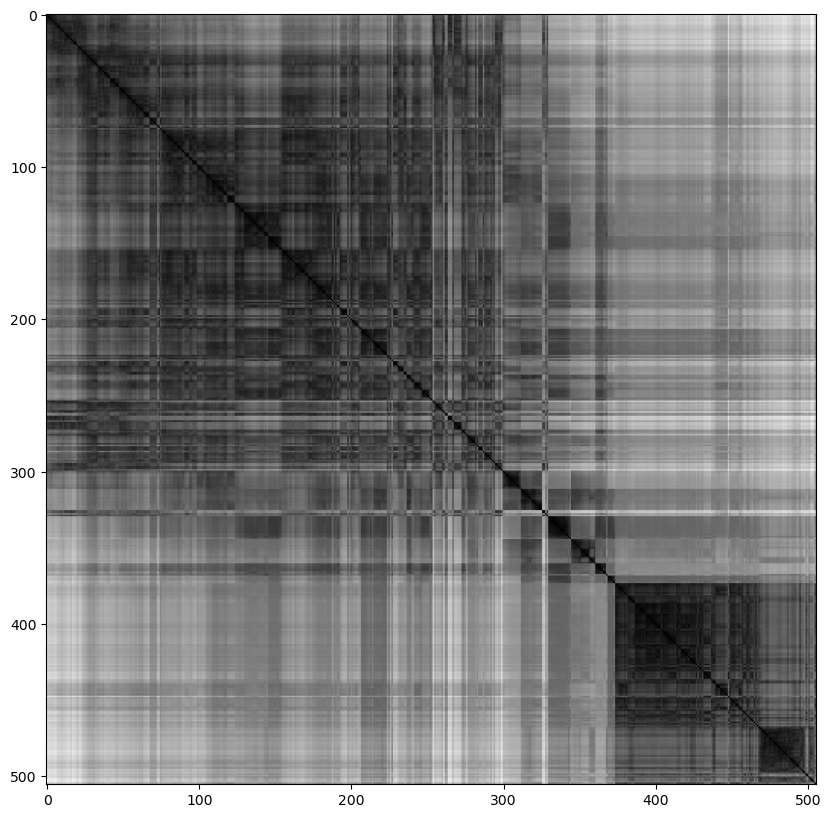

In [184]:
x = vat(df_result)
print(x)

None


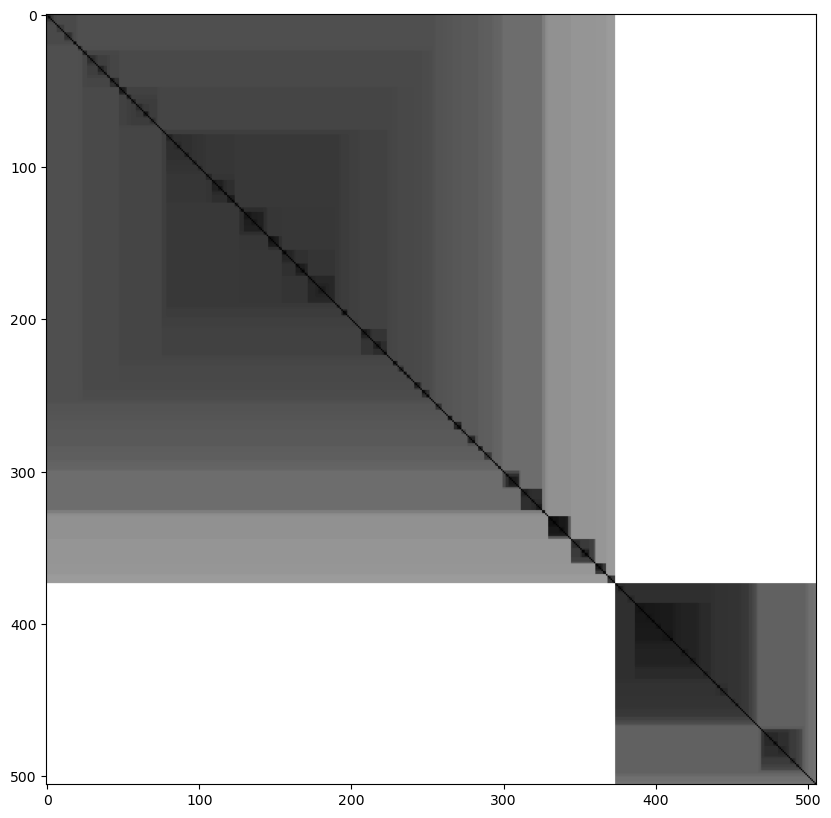

In [185]:
print(ivat(df_result))

* En s'ppuyant sur ces deux tests on peut déduire que les données de notre dataset peuvent être répartis en deux classes différentes.

In [188]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_result)

# Predict the cluster for each data point
labels = kmeans.predict(df_result)
labels.size

506

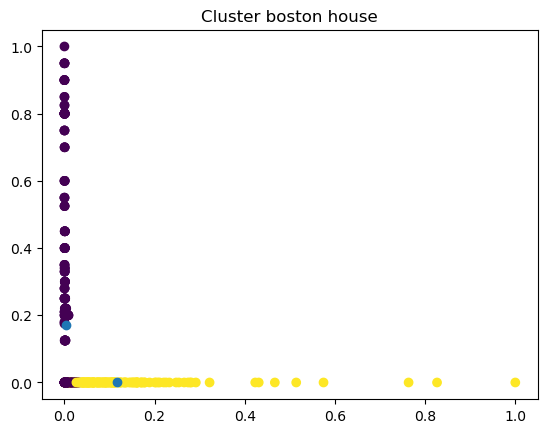

In [49]:
k_mean = KMeans(n_clusters=2, random_state=0).fit(df_result)
pred = labels
plt.scatter(df_result.iloc[:, 0], df_result.iloc[:, 1], c=pred)
plt.scatter(k_mean.cluster_centers_[:, 0], k_mean.cluster_centers_[:, 1])
plt.title("Cluster boston house")
plt.show()

 * A la suite de l'entrainement et prédiction du modèle K-MEANS avec le paramétre 'nombre de cluster = 2', on a comme résultat le label de l'appartenance de chaque ligne de notre data set.

### Création des deux clusters

In [190]:
data_to_class['Cluster'] = labels
data_to_class

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,Cluster
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [193]:
cluster_0_df = data_to_class[data_to_class['Cluster'] == 0]
cluster_1_df = data_to_class[data_to_class['Cluster'] == 1]

In [194]:
cluster_0_df = cluster_0_df.drop("Cluster", axis=1)
cluster_1_df = cluster_1_df.drop("Cluster", axis=1)

In [195]:
cluster_0_df.shape

(338, 14)

In [196]:
cluster_1_df.shape

(168, 14)

#### Regression sur le premeir cluster 

<Axes: >

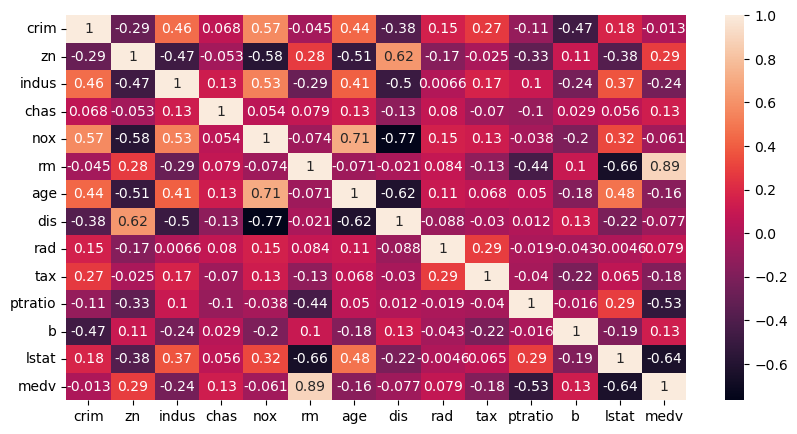

In [62]:
plt.figure(figsize=(10, 5))
sns.heatmap(cluster_0_df.corr(),  annot=True)

* On a pas la correlation forte entre 'tax' et 'rad' pour la premiére classe.

### Valeurs aberrantes

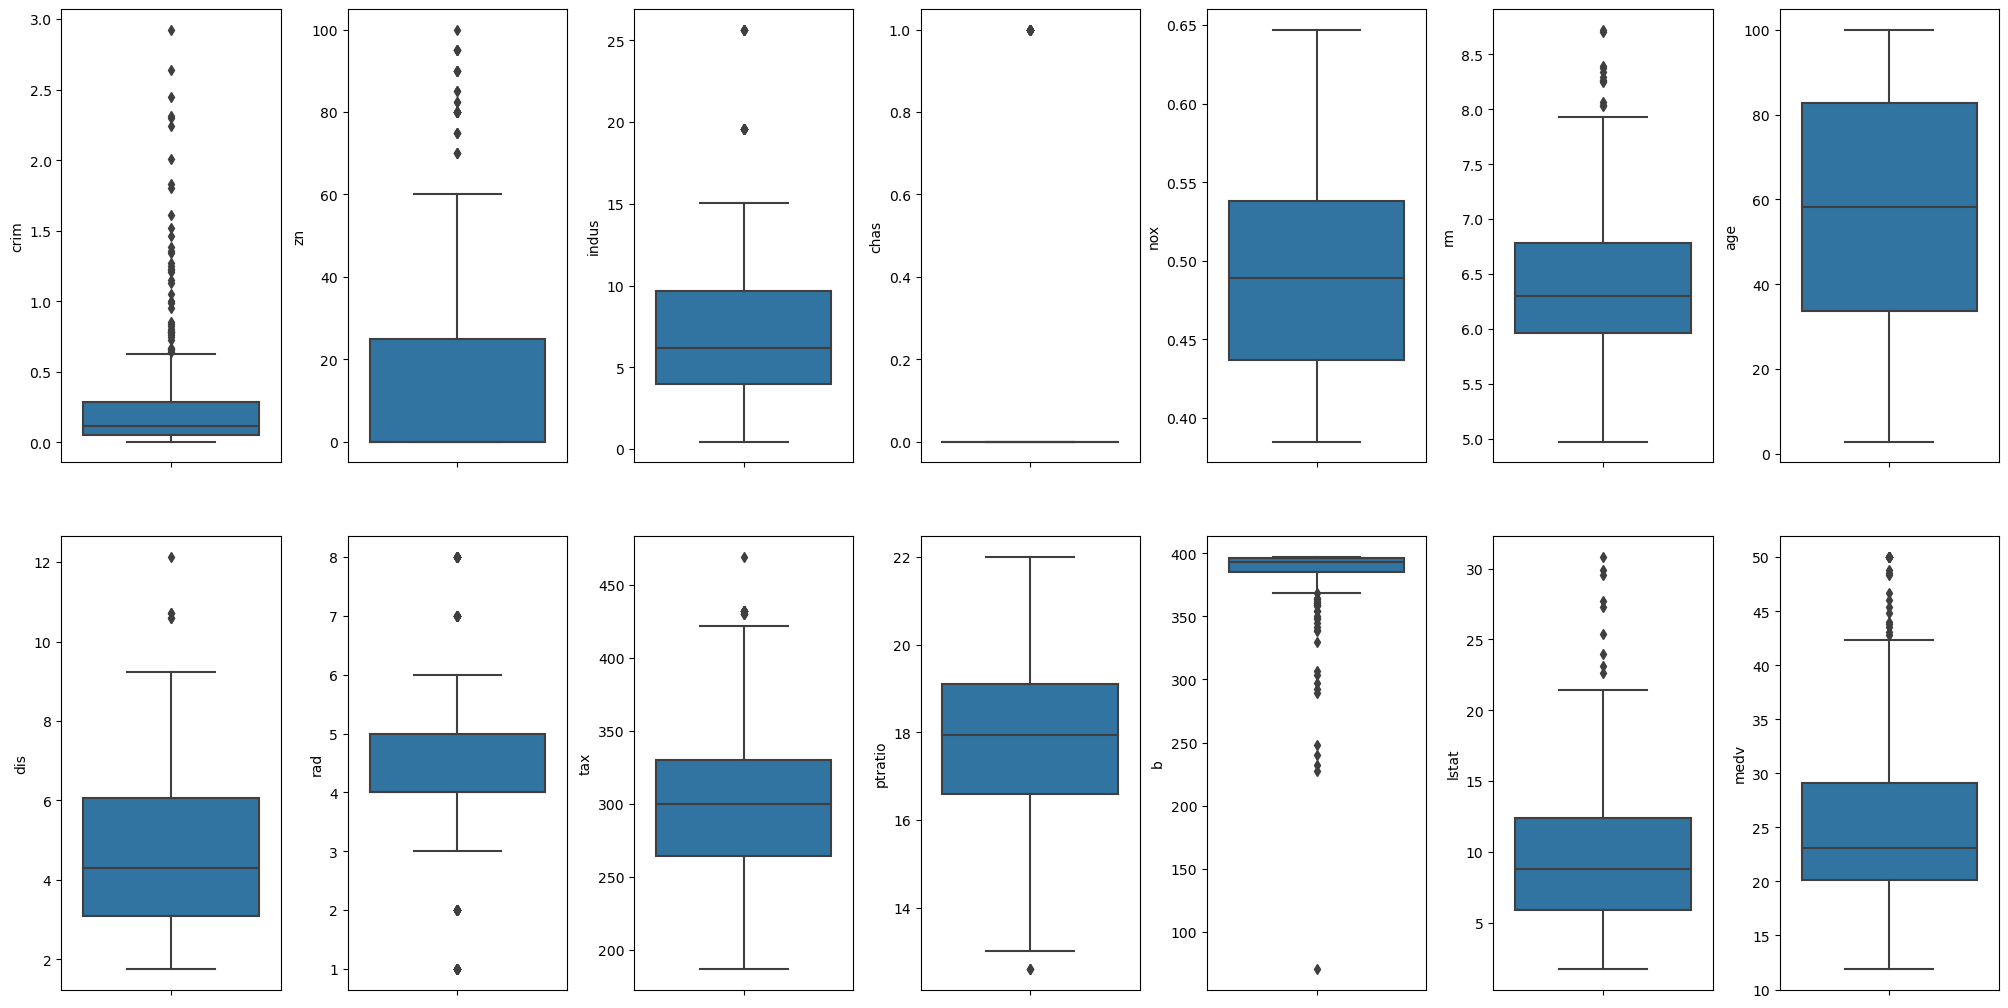

In [197]:
data = cluster_0_df
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [198]:

z_scores = np.abs(stats.zscore(data))

# Define the threshold (e.g., z-score greater than 3)
threshold = 3

# Create a boolean mask to identify the outliers
outlier_mask = (z_scores > threshold).any(axis=1)

#Filter the dataset to remove the outliers
data_filtred = data[~outlier_mask]
data_filtred.shape

(288, 14)

In [199]:
scaler = MinMaxScaler()

# Normalize all columns of the DataFrame
data_normalized = pd.DataFrame(scaler.fit_transform(data_filtred), columns=data_filtred.columns)

In [200]:
model = sm.formula.ols("medv ~ 1 + zn+rm+ age+ dis+ rad+ tax+ ptratio ",data = data_normalized).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     230.9
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          2.41e-112
Time:                        15:18:32   Log-Likelihood:                 323.36
No. Observations:                 288   AIC:                            -630.7
Df Residuals:                     280   BIC:                            -601.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3208      0.030     10.601      0.000       0.261       0.380
zn             0.0510      0.024      2.097      0.037       0.003       0.099
rm             0.7607      0.028     27.540      0.000       0.706       0.815
age           -0.1523      0.022     -6.870      0.000      -0.196      -0.109
dis           -0.2059      0.031     -6.595      0.000      -0.267      -0.144
rad            0.0553      0.020      2.704      0.007       0.015       0.096
tax           -0.1042      0.023     -4.455      0.000      -0.150      -0.058
ptratio       -0.1326      0.025     -5.234      0.000      -0.182      -0.083
==============================================================================
Omnibus:                       44.969   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.371
Skew:                           0.784   Prob(JB):                     7.18e-22
Kurtosis:                       5.379   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* On ramarque que les variables significatives ne sont plus les mêmes qu'avec le model initail. De plus, la significativité des coefficient est différentes, les variables les plus signifactives dans l'ordre sont sont  : 'rm' , 'age', 'dis', 'ptratio', 'tax', 'rad', 'zn'.
* Le score r2 est plus haut comparant au modèl de la question une de plus de 10 point d'ecart.

### La relation linéaire

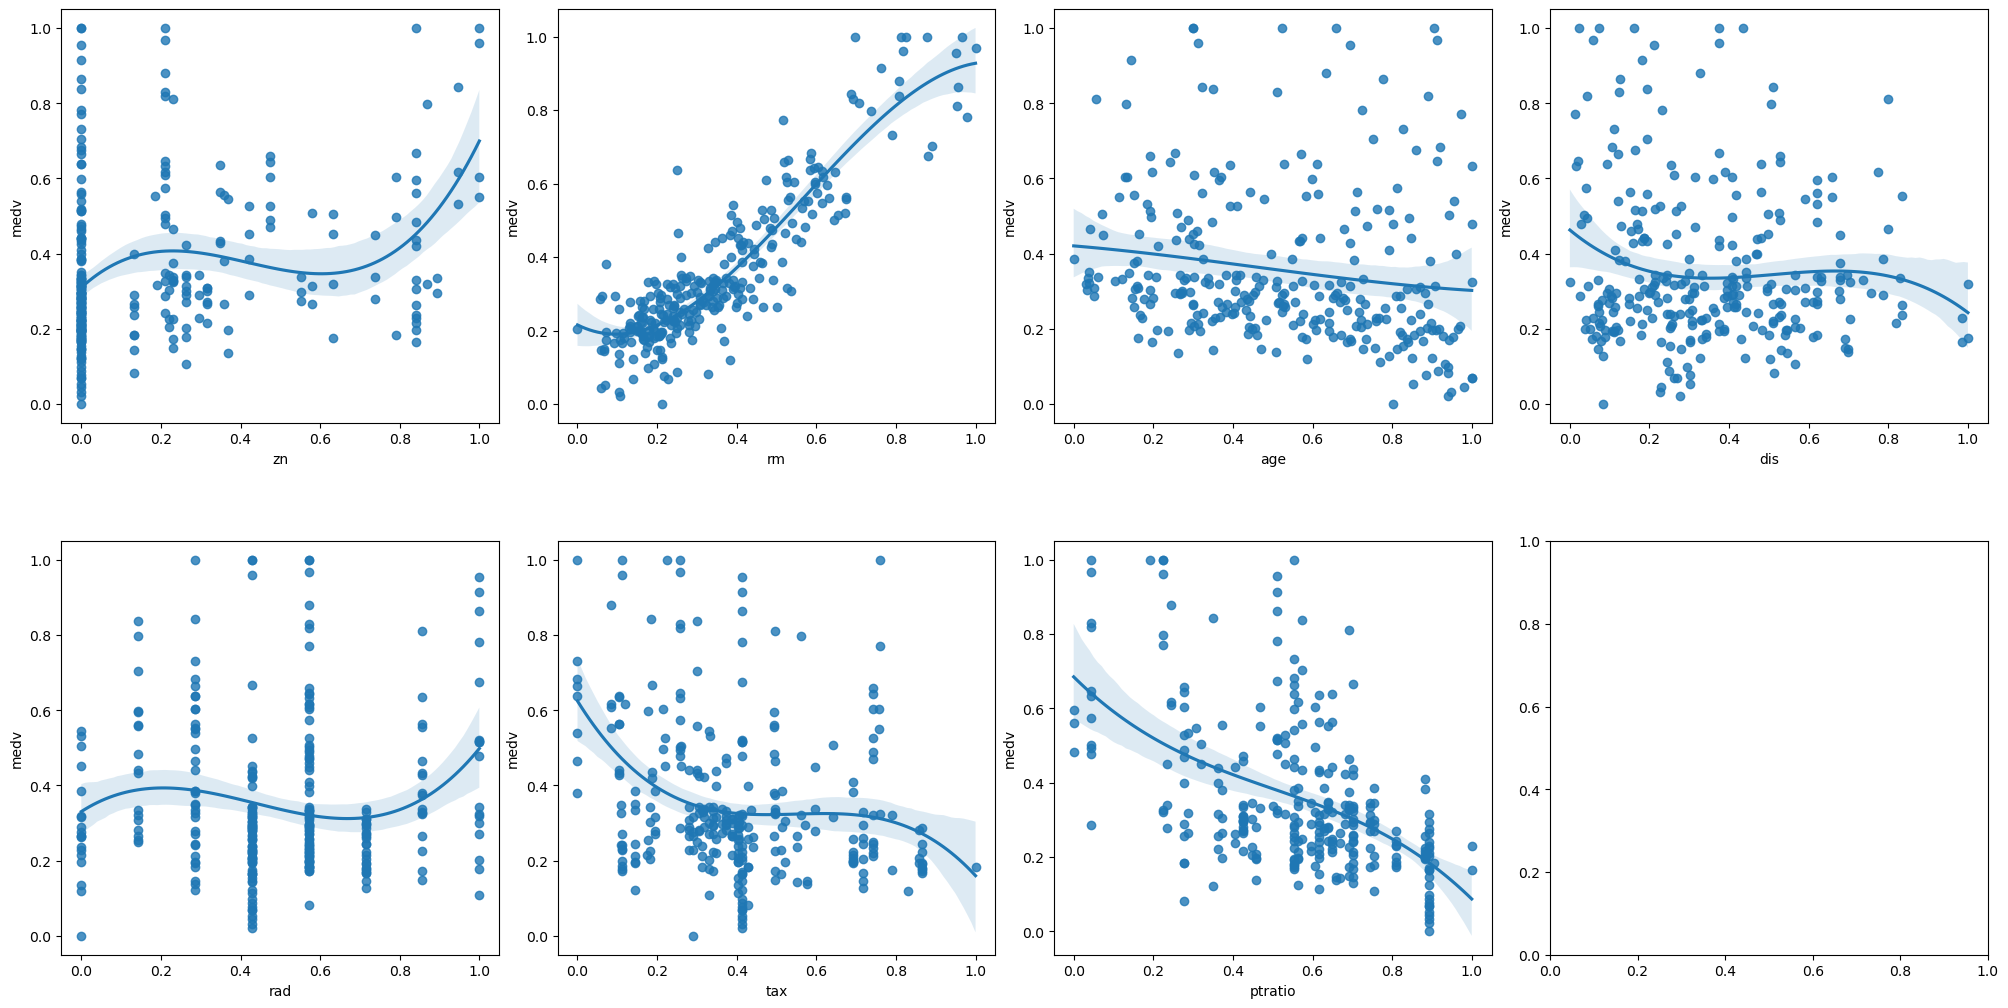

In [201]:
l = ['zn','rm','age','dis','rad','tax','ptratio']


x = data_normalized.loc[:,l]
y = data_normalized['medv']
x = pd.DataFrame(data=x, columns=l)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(l):
    sns.regplot(y=y, x=x[k], ax=axs[i],order=3)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### analyse des résidus

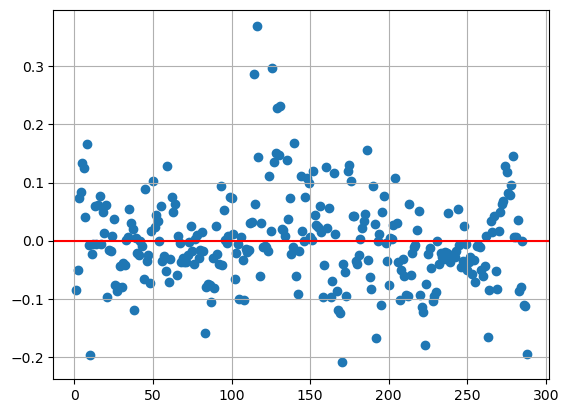

In [91]:
abs = np.arange(1,len(model.resid)+1)
axes = plt.axes()
axes.grid()
plt.scatter(abs, model.resid)
plt.axhline(y=0, color='r', linestyle='-')

* la normalité des résidus

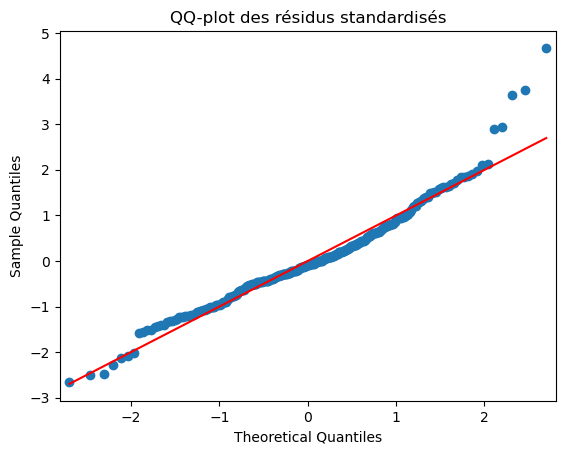

In [94]:
residuals = model.resid
std_residuals = (residuals - residuals.mean()) / residuals.std() 
sm.qqplot(std_residuals, line='s')  
plt.title('QQ-plot des résidus standardisés')
plt.show()

### test de scale location

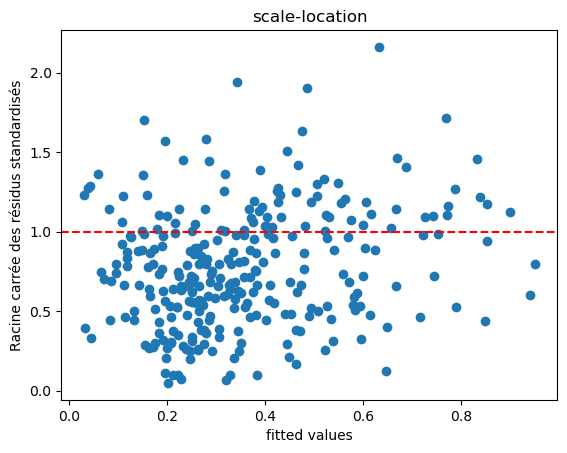

In [202]:
# Calculer les valeurs ajustées (fitted values)
fitted_values = model.fittedvalues

# Calculer les résidus standardisés
residuals = model.resid
std_residuals = (residuals - residuals.mean()) / residuals.std()

# Calculer la racine carrée des résidus standardisés
sqrt_std_residuals = np.sqrt(np.abs(std_residuals))

# Tracer le graphique de la racine carrée des résidus standardisés en fonction des valeurs ajustées
plt.scatter(fitted_values, sqrt_std_residuals)
plt.axhline(y=1, color='red', linestyle='--')  # Ligne horizontale à y=1 (pour tester la constance de la variance)
plt.xlabel('fitted values')
plt.ylabel('Racine carrée des résidus standardisés')
plt.title('scale-location')
plt.show()

* On remarque que la disribution est aléatoire.
* Les distribus suivent parfaitement la loi normale, donc la regression est plsu ou moins verifiée, car il existe encore des points non centrés dans la distributiond es résidus et qui ne suivent pas la loi normal.

### Regression sur le deuxiéme cluster 

<Axes: >

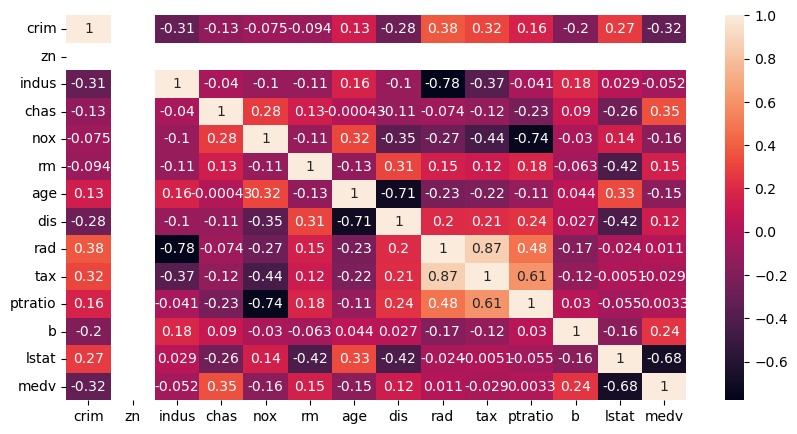

In [203]:
plt.figure(figsize=(10, 5))
sns.heatmap(cluster_1_df.corr(),  annot=True)

* Pour la deuxiéme classe on a toujours la correlation forte entre 'tax' et 'rad', on doit en éliminer 'rad' pour en garder qu'une seule variable.

### Valeurs aberrantes

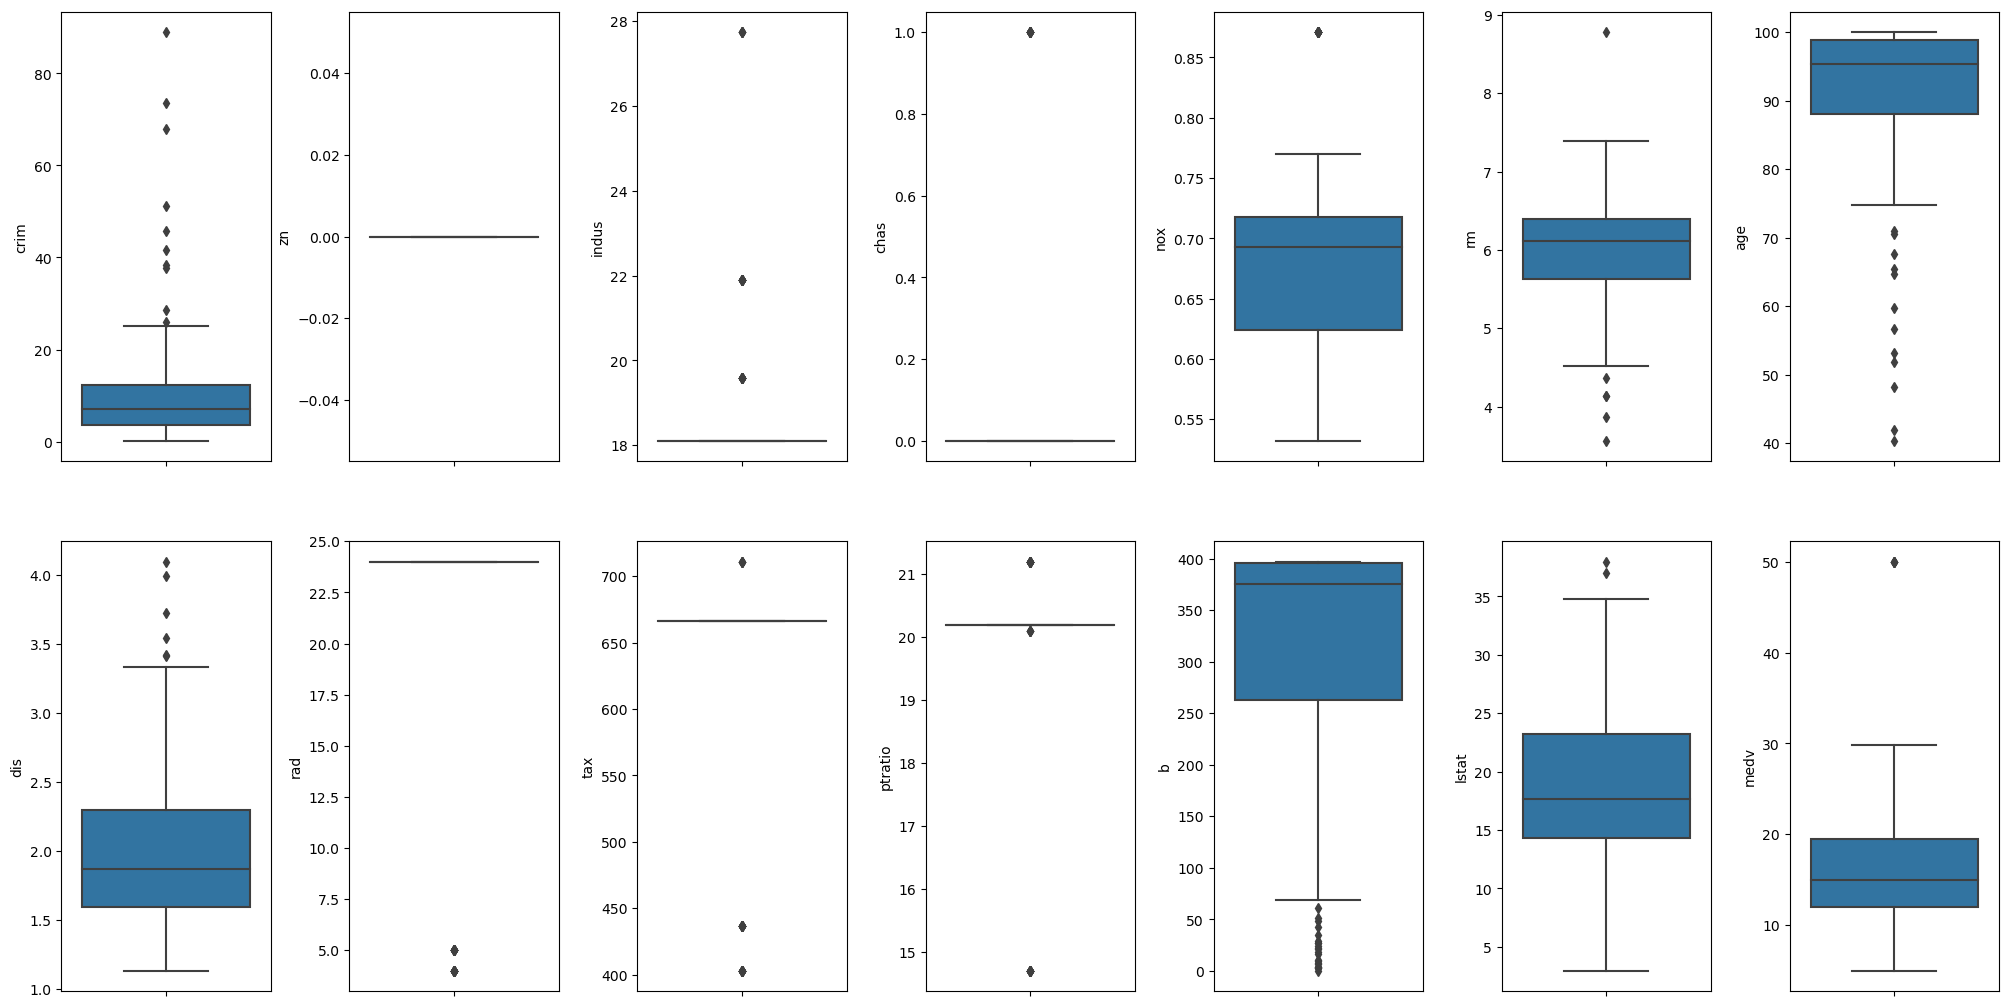

In [204]:
data = cluster_1_df
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [205]:

z_scores = np.abs(stats.zscore(data))

# Define the threshold (e.g., z-score greater than 3)
threshold = 3

# Create a boolean mask to identify the outliers
outlier_mask = (z_scores > threshold).any(axis=1)

#Filter the dataset to remove the outliers
data_filtred = data[~outlier_mask]
data_filtred.shape

(126, 14)

In [206]:
scaler = MinMaxScaler()

# Normalize all columns of the DataFrame
data_normalized = pd.DataFrame(scaler.fit_transform(data_filtred), columns=data_filtred.columns)

In [207]:
model = sm.formula.ols("medv ~ 1 + crim+ indus+ chas+tax+ ptratio+ b+ lstat",data = data_normalized).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     32.78
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           1.67e-18
Time:                        15:23:02   Log-Likelihood:                 69.662
No. Observations:                 126   AIC:                            -129.3
Df Residuals:                     121   BIC:                            -115.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3642      0.026     13.857      0.000       0.312       0.416
crim          -0.2437      0.089     -2.728      0.007      -0.421      -0.067
indus          0.1149      0.019      6.031      0.000       0.077       0.153
chas        1.166e-16   1.38e-17      8.471      0.000    8.94e-17    1.44e-16
tax            0.2494      0.020     12.496      0.000       0.210       0.289
ptratio        0.1149      0.019      6.031      0.000       0.077       0.153
b              0.0846      0.036      2.334      0.021       0.013       0.156
lstat         -0.5378      0.074     -7.238      0.000      -0.685      -0.391
==============================================================================
Omnibus:                       31.886   Durbin-Watson:                   1.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.574
Skew:                           1.134   Prob(JB):                     5.19e-13
Kurtosis:                       5.373   Cond. No.                     1.44e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

 * Le modèle de la deuxiéme classe est moins performant et rencontre des probléme de multicollénearité.
 * Le modèle compte plus de variables significatives, ce qui est dû au nombre de données en entrée.

### Analyse des résidus

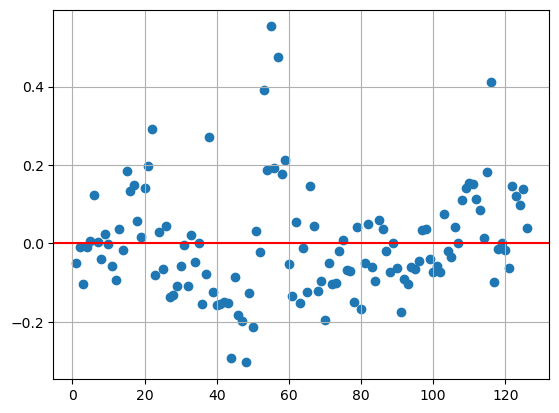

In [208]:
abs = np.arange(1,len(model.resid)+1)
axes = plt.axes()
axes.grid()
plt.scatter(abs, model.resid)
plt.axhline(y=0, color='r', linestyle='-')

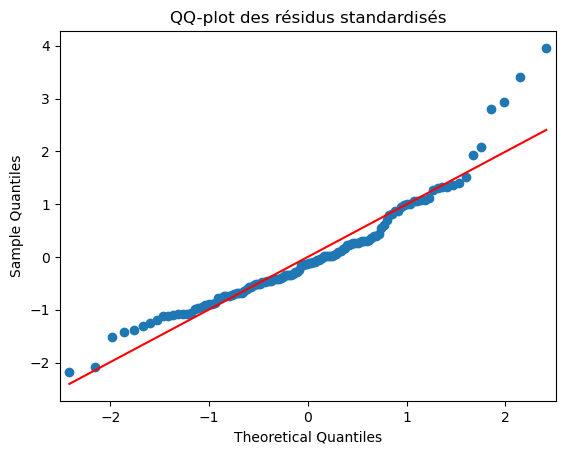

In [209]:
residuals = model.resid
std_residuals = (residuals - residuals.mean()) / residuals.std() 
sm.qqplot(std_residuals, line='s')  
plt.title('QQ-plot des résidus standardisés')
plt.show()

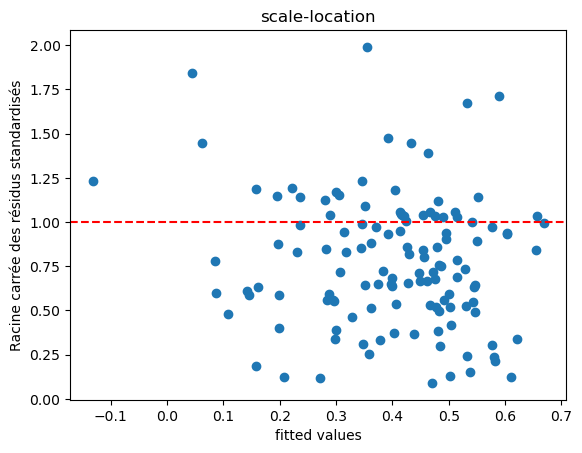

In [210]:
# Calculer les valeurs ajustées (fitted values)
fitted_values = model.fittedvalues

# Calculer les résidus standardisés
residuals = model.resid
std_residuals = (residuals - residuals.mean()) / residuals.std()

# Calculer la racine carrée des résidus standardisés
sqrt_std_residuals = np.sqrt(np.abs(std_residuals))

# Tracer le graphique de la racine carrée des résidus standardisés en fonction des valeurs ajustées
plt.scatter(fitted_values, sqrt_std_residuals)
plt.axhline(y=1, color='red', linestyle='--')  # Ligne horizontale à y=1 (pour tester la constance de la variance)
plt.xlabel('fitted values')
plt.ylabel('Racine carrée des résidus standardisés')
plt.title('scale-location')
plt.show()

* L'analyse des résidus montre que l'hypothése de la normalité des résidus est rejetée.
* La distributions des résidus n'est pas aléatoire et homogénes.
* es problémes sont dû avec une forte probabilité au manque des données pour l'entrainement du modéle.
Alors la regression n'est pas vérifiée.
 

## 5 

 * En faisant les modèles de regresssions appliqués au cluster issus de la classification, j'ai dédui que : 
     * La performance et la qualité du modèle peut être améliorée en classant les données de la regression, mais tout een s'assurant d'avoir la quantité de données suffisante pour l'entrainement du modèle de chaque cluster.
 * Le modèle le plus performant est le modèle avec les transformations spécifiques pour chaques variables significatives, car il prend compte et améliore la relation linéaire de chaque variables en s'appuyant sur l'analyse sa relation avec la variable à expliquer, donc il permet une amélioration personnalisé des entrées du modèle.
 * Le modèle log-log peut être une solution dans le cas d'une absence de relation visuelle entres les variables, on est sur que cette transformation permet de normaliser dans un premier cas les données en entrées et ne peut que augmenter les performances du modèle.
 * J'ai pu conclure aussi que les valeurs aberrantes peuvent présenter un réel probléme lors l'entrainement d'un modèle, et donc l'obligation de les traiter en premiére étape dans le processus de création d'un modèle prédictif.
  